In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df['Country'].value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [33]:
df['Year'].value_counts()

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64

In [6]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [7]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


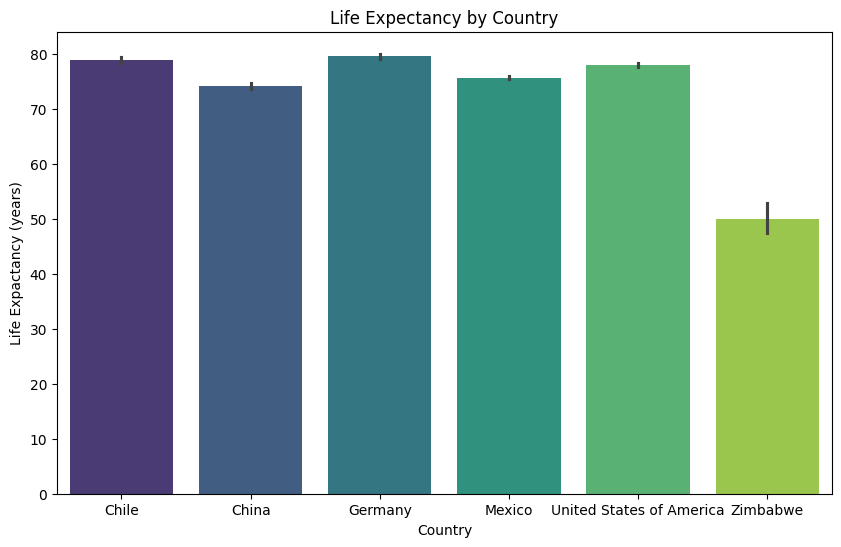

In [32]:
plt.figure(figsize=(10,6))

sns.barplot(x='Country', y='Life expectancy at birth (years)', data=df, hue='Country', palette='viridis')

plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expactancy (years)')

plt.show()

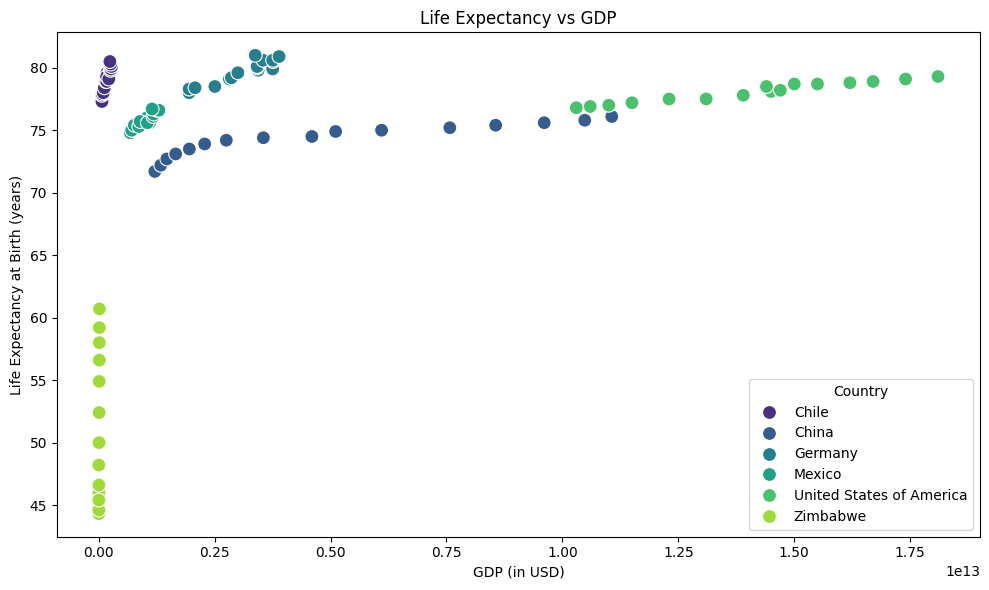

In [34]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df, hue='Country', palette='viridis', s=100)

# Set the title and labels
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP (in USD)')
plt.ylabel('Life Expectancy at Birth (years)')

plt.tight_layout()
plt.savefig('life_ex_GDP.png', dpi=300)

# Show the plot
plt.show()

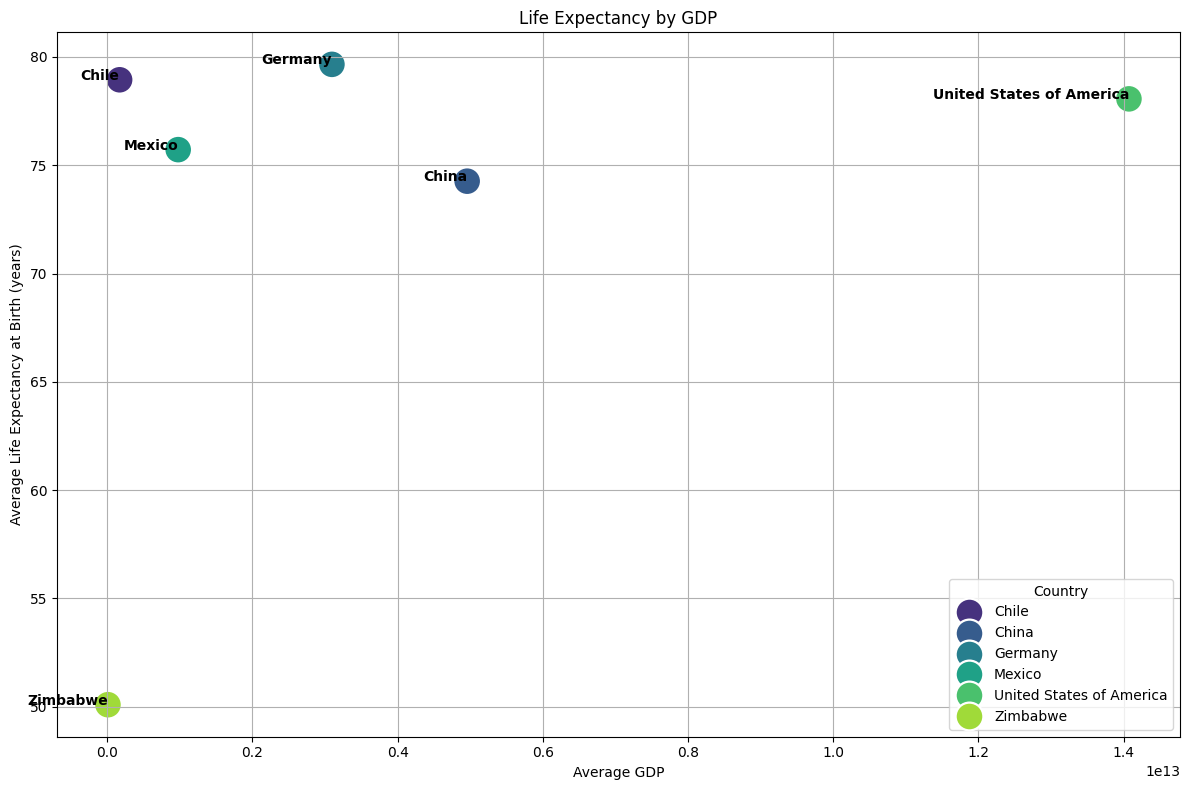

In [35]:
# Group by 'Country' and calculate the mean life expectancy and GDP
country_stats = df.groupby('Country').agg(
    avg_life_expectancy=('Life expectancy at birth (years)', 'mean'),
    avg_gdp=('GDP', 'mean')
).reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=country_stats, x='avg_gdp', y='avg_life_expectancy', s=400, hue='Country', palette='viridis')

# Annotate each point with the country name
for i in range(len(country_stats)):
    plt.text(
        country_stats['avg_gdp'][i],
        country_stats['avg_life_expectancy'][i],
        country_stats['Country'][i],
        horizontalalignment='right',
        size='medium',
        color='black',
        weight='semibold'
    )

# Set plot title and labels
plt.title('Life Expectancy by GDP')
plt.xlabel('Average GDP')
plt.ylabel('Average Life Expectancy at Birth (years)')
plt.grid(True)

plt.tight_layout()
plt.savefig('life_ex_GDP.png', dpi=300)

plt.show()

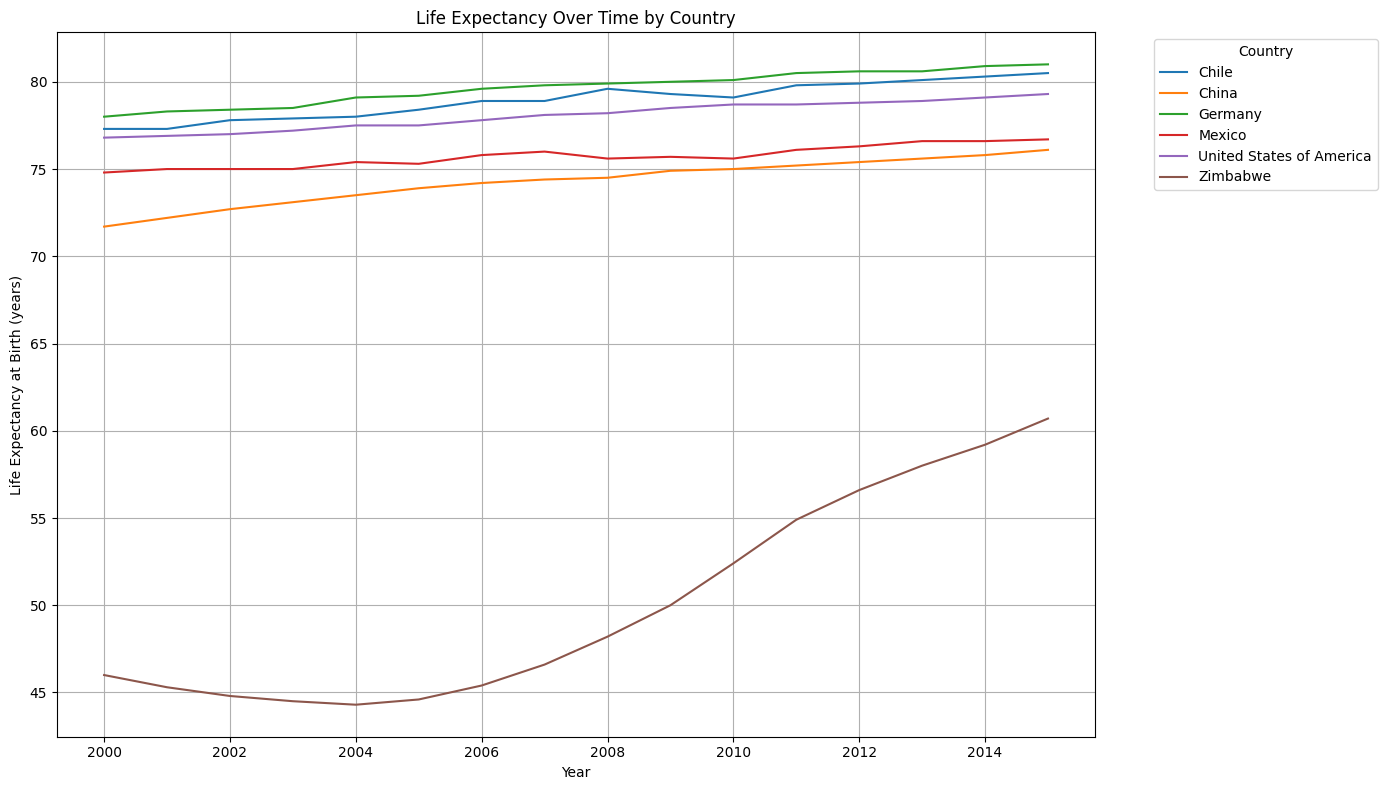

In [36]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.savefig('life_ex_time.png', dpi=300)

plt.show()

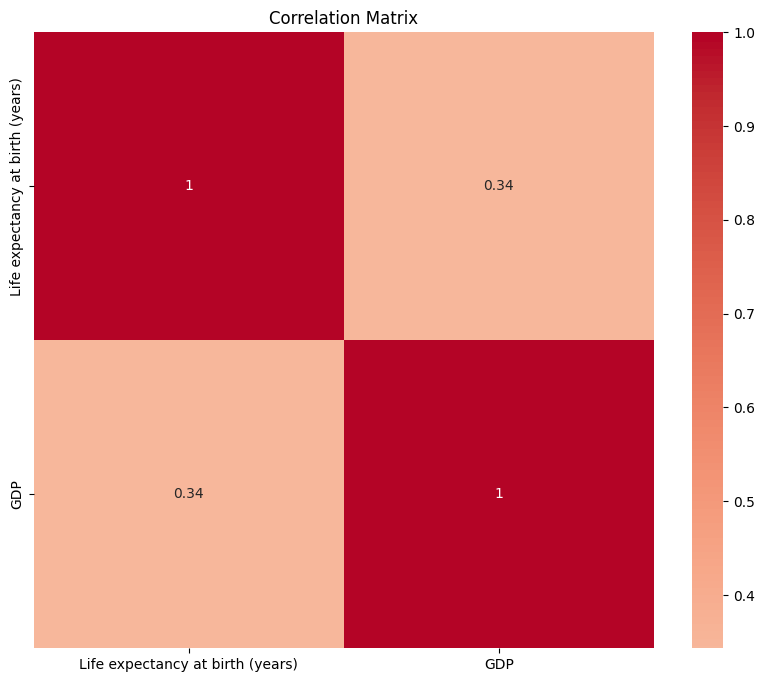

In [15]:
correlation_matrix = df[['Life expectancy at birth (years)', 'GDP']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

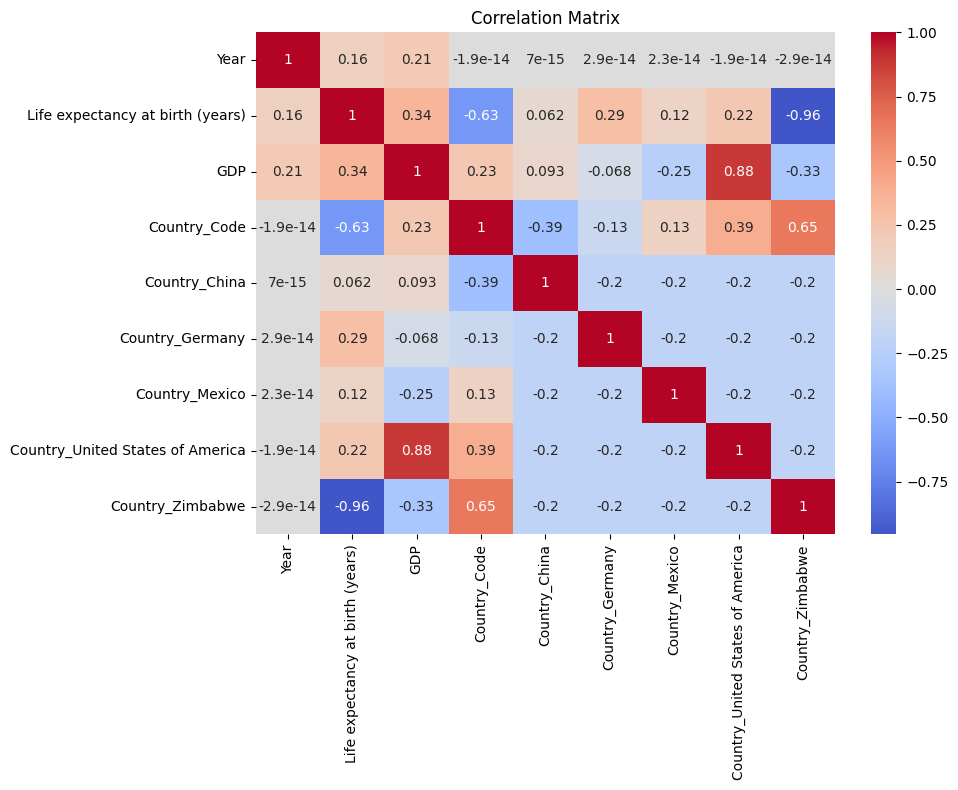

In [42]:
df_dummies = pd.get_dummies(df, columns=['Country'], drop_first=True)

correlation_matrix_dummies = df_dummies.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dummies, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.savefig('corr_heatmap.png')

plt.show()

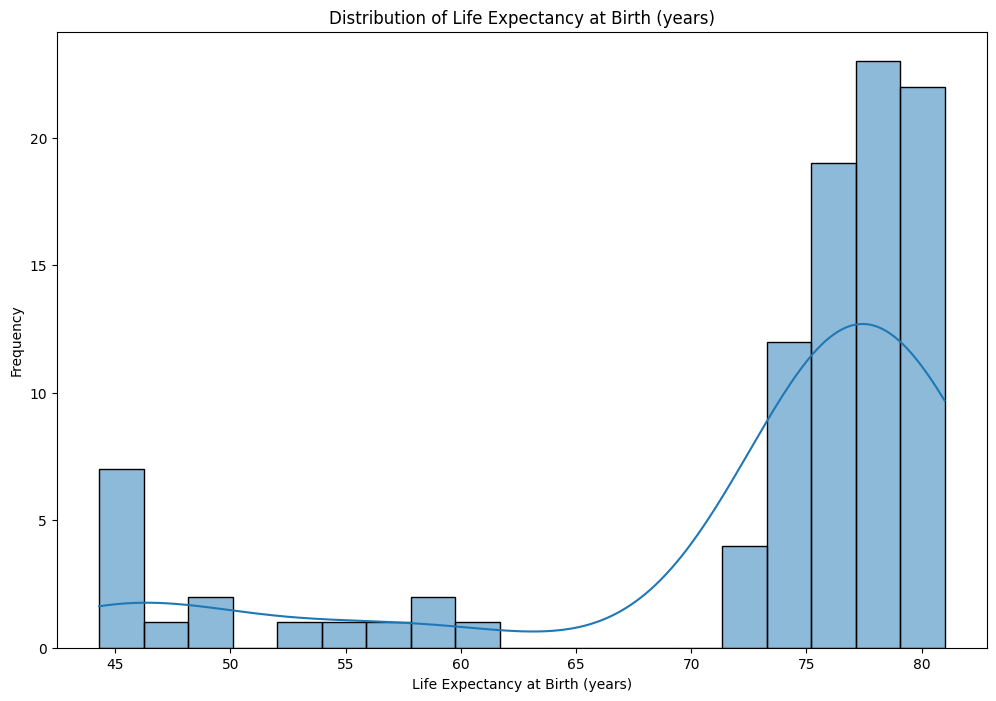

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Life expectancy at birth (years)'], kde=True)
plt.title('Distribution of Life Expectancy at Birth (years)')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Frequency')
plt.show()

C:\Users\annap\AppData\Local\Temp\ipykernel_32756\639474345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_life_expectancy_by_country.values, y=avg_life_expectancy_by_country.index, palette='viridis')


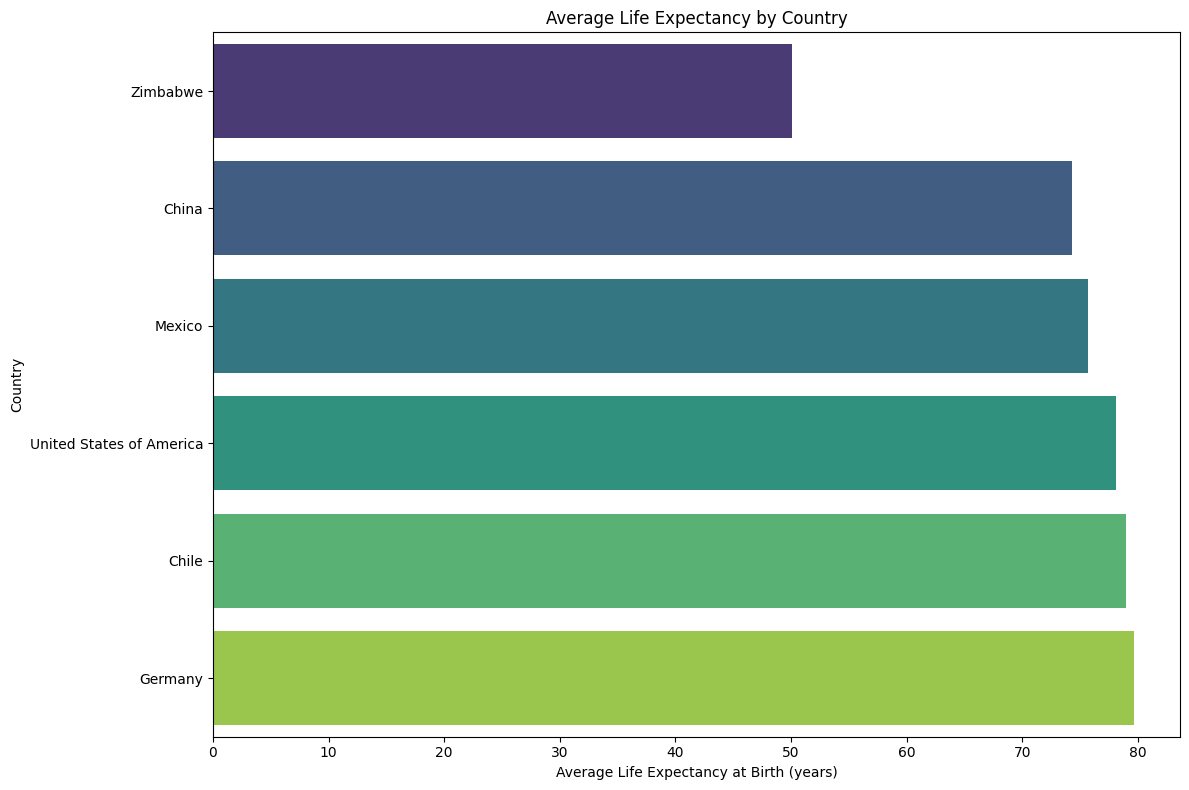

In [37]:
avg_life_expectancy_by_country = df.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_life_expectancy_by_country.values, y=avg_life_expectancy_by_country.index, palette='viridis')
plt.title('Average Life Expectancy by Country')
plt.xlabel('Average Life Expectancy at Birth (years)')
plt.ylabel('Country')

plt.tight_layout()
plt.savefig('avg_life_country.png')

plt.show()